## Electronic store analysis

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [110]:
files = os.listdir("Sales_data")
salesTransactions = pd.DataFrame()
for file in files:
    filePath = "./Sales_data/" + str(file)
    monthTransactions = pd.read_csv(filePath)
    salesTransactions = pd.concat([salesTransactions, monthTransactions]) 
salesTransactions.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


In [111]:
### Converting annaul transactions to csv file
salesTransactions.to_csv("AnnualTransactions.csv")

## Clean up data

In [112]:
### Drop Rows NaN
NaN_df = salesTransactions[salesTransactions.isna().any(axis=1)]
NaN_df.head()

df = salesTransactions.dropna(how= "all")

In [113]:
### Get rid of text in order date column
df = df[df["Order Date"].str[0:2]!="Or"]

In [114]:
### Make column types correct
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
### Creating month Column

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

df['Date'] = df['Order Date'].str[3:5]
df['Date'] = df['Date'].astype('int32')


df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,22
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,18


In [115]:
### Add hour and minute

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,22,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,18,12,38,1


In [93]:
### Adding City Column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Date,Time,City
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,30,00:01:00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,29,07:03:00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,12,18:21:00,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,22,15:13:00,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,18,12:38:00,Atlanta (GA)


## Data Exploration!
#### Question 1: What was the best month for sales? How much was earned that month?

In [94]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

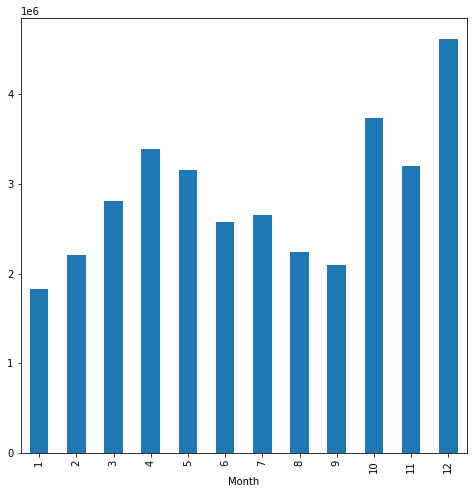

In [103]:
sums = df.groupby(['Month']).sum()
sums["Sales"].plot(kind="bar", figsize=(8,8),stacked= False);

### Which city sold the most?

In [105]:
sums = df.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Date,Sales
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,234837,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,156782,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,312376,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,234435,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,469607,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,392706,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,38288,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,159233,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,702669,8.262204e+06


### Best time to advertise 

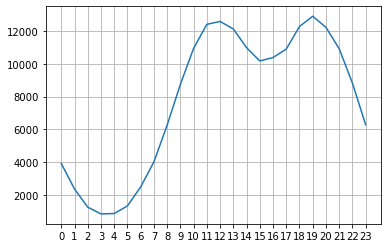

In [117]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm
